In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gene-expression-bioinformatics-dataset/Spellman.csv


In [2]:
import numpy as np
import pandas as pd
import random
import keras
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
original_data = pd.read_csv("/kaggle/input/gene-expression-bioinformatics-dataset/Spellman.csv")

#as first column and first row are just to describe data we are going to slice it

data = np.array(original_data)
data = data[1:,1:]
data = data.astype(float)
data = scaler.fit_transform(data)

2025-07-01 23:47:35.282837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751413655.492788      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751413655.554704      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data.shape

(4380, 23)

In [4]:
data

array([[0.67177033, 0.67275748, 0.58068314, ..., 0.41527446, 0.6286201 ,
        0.50817997],
       [0.65933014, 0.68272425, 0.62661954, ..., 0.35799523, 0.62521295,
        0.49897752],
       [0.56363636, 0.61129568, 0.52414604, ..., 0.68019093, 0.52129472,
        0.37730062],
       ...,
       [0.58181818, 0.59800664, 0.50412249, ..., 0.63961814, 0.51618399,
        0.37525563],
       [0.73971292, 0.67774086, 0.55830388, ..., 0.41050119, 0.70017036,
        0.57361964],
       [0.70813397, 0.68604651, 0.56419316, ..., 0.42004773, 0.69335605,
        0.56646218]])

In [5]:
train_data, test_data = train_test_split(data, test_size =0.2)

hidden_layer = 3
original_dim = 23


input_layer = keras.Input(shape=(23,))
encoding_layer = keras.layers.Dense(hidden_layer, activation = 'relu')(input_layer)
decoding_layer = keras.layers.Dense(original_dim, activation = 'sigmoid')(encoding_layer)
auto_encoder = keras.Model(input_layer, decoding_layer)
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
auto_encoder.fit(train_data, train_data,
            epochs=50,
            batch_size=250,
            shuffle=True,
            validation_data=(test_data,test_data)
    
)

I0000 00:00:1751413670.349205      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751413670.350015      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/50


I0000 00:00:1751413672.770744      63 service.cc:148] XLA service 0x7e78a0008a90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751413672.771321      63 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751413672.771345      63 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751413672.992934      63 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - loss: 0.7524

I0000 00:00:1751413673.659769      63 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.7484 - val_loss: 0.7357
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7327 - val_loss: 0.7226
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7204 - val_loss: 0.7127
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7113 - val_loss: 0.7053
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7043 - val_loss: 0.6998
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6990 - val_loss: 0.6956
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6952 - val_loss: 0.6924
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6921 - val_loss: 0.6900
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6898 - val_loss: 0.6880
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6880 - val_loss: 0.6865
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6866 - val_loss: 0.6852
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6853 - val_loss: 0.6841

In [6]:
#encoder
encoder_model = keras.Model(input_layer, encoding_layer)

#decoder
encoded_input = keras.Input(shape=(3,))
decoder_layer = auto_encoder.layers[-1](encoded_input)

decoder = keras.Model(encoded_input, decoder_layer)

In [7]:
encoding_genes = encoder_model.predict(data)
print(encoding_genes)

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.         0.         0.38266143]
 [0.         0.         0.34713897]
 [0.         0.         0.40197602]
 ...
 [0.         0.         0.3139753 ]
 [0.         0.         0.4330497 ]
 [0.         0.         0.45160487]]


In [8]:
decoding_genes = decoder.predict(encoding_genes)
print(decoding_genes)
print(decoding_genes.shape)

137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.60995436 0.6034585  0.572919   ... 0.4687648  0.5827775  0.461866  ]
 [0.6094564  0.6045132  0.5718846  ... 0.46738598 0.58237016 0.45937112]
 [0.6102249  0.60288453 0.5734812  ... 0.4695147  0.582999   0.46322334]
 ...
 [0.6089914  0.60549706 0.57091826 ... 0.46609914 0.58198977 0.45704374]
 [0.61066014 0.60196066 0.5743852  ... 0.47072148 0.5833551  0.46540818]
 [0.61092    0.60140866 0.5749249  ... 0.47144228 0.5835678  0.46671352]]
(4380, 23)


In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
x = encoding_genes[:,0]
y = encoding_genes[:,1]
z = encoding_genes[:,2]

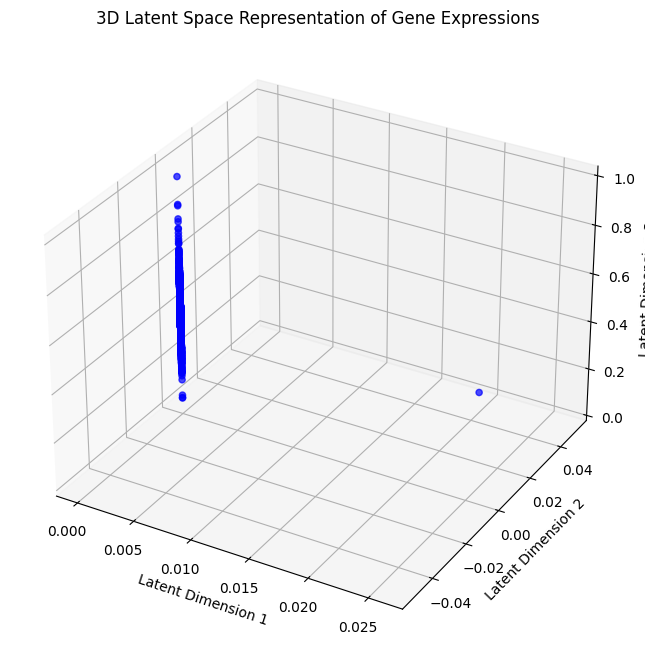

In [11]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c='blue', marker='o', alpha=0.7)
ax.set_xlabel('Latent Dimension 1')
ax.set_ylabel('Latent Dimension 2')
ax.set_zlabel('Latent Dimension 3')
ax.set_title('3D Latent Space Representation of Gene Expressions')

plt.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score as DBI
from sklearn.mixture import GaussianMixture as GMM


In [13]:
kmean_cluster = KMeans(n_clusters=3, random_state=0)
kmean_cluster.fit_predict(encoding_genes)
labels = kmean_cluster.labels_
scoring = DBI(encoding_genes, labels)
print(scoring)

0.5921516610682184


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
Gaussian_mix = GMM(n_components = 3, random_state=0).fit_predict(encoding_genes)
print(Gaussian_mix)
scores = DBI(encoding_genes, Gaussian_mix)
print(scores)

[2 2 2 ... 2 2 2]
1.4174966141661474


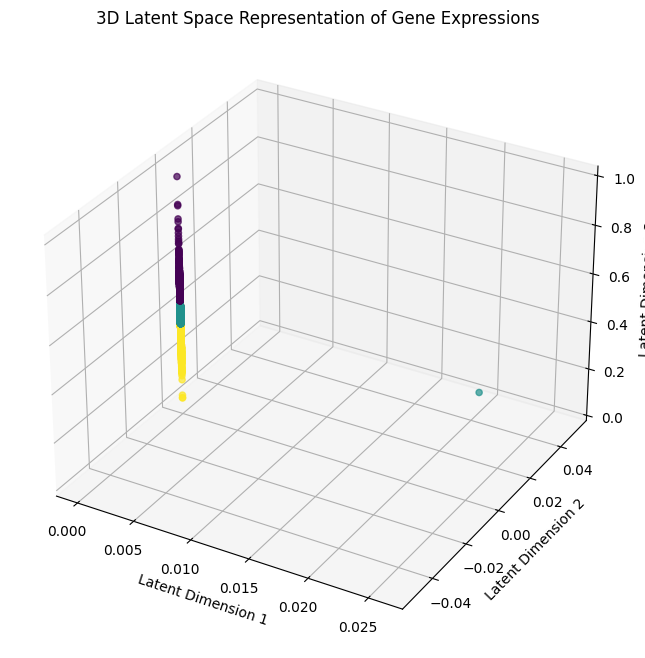

In [15]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=labels, cmap = 'viridis', marker='o', alpha=0.7)
ax.set_xlabel('Latent Dimension 1')
ax.set_ylabel('Latent Dimension 2')
ax.set_zlabel('Latent Dimension 3')
ax.set_title('3D Latent Space Representation of Gene Expressions')

plt.show()

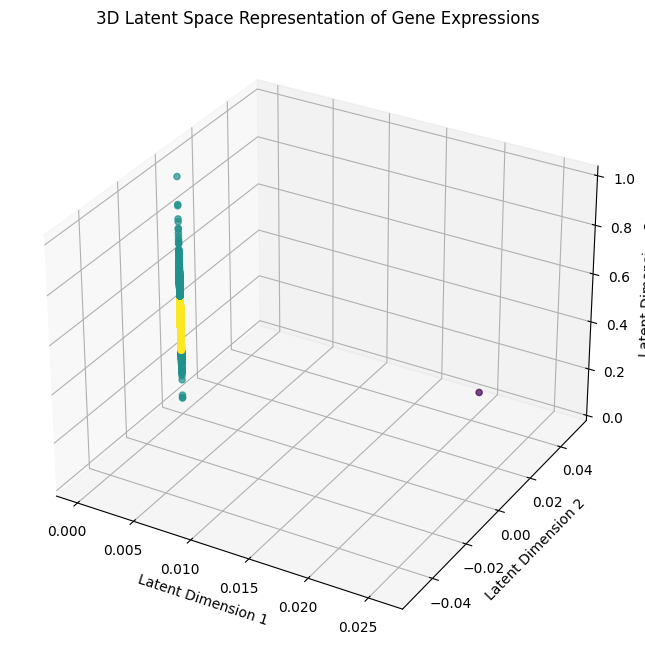

In [16]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=Gaussian_mix, cmap = 'viridis', marker='o', alpha=0.7)
ax.set_xlabel('Latent Dimension 1')
ax.set_ylabel('Latent Dimension 2')
ax.set_zlabel('Latent Dimension 3')
ax.set_title('3D Latent Space Representation of Gene Expressions')

plt.show()

#NEW_MODEL

In [17]:
train_data, test_data = train_test_split(data, test_size =0.3)

layer1 = 12
layer2 = 6
encoding = 3
original_dim = 23

#encoding
input_layer = keras.Input(shape=(23,))
hidden_layer1 = keras.layers.Dense(layer1, activation = 'relu')(input_layer)
hidden_layer2 = keras.layers.Dense(layer2, activation = 'relu')(hidden_layer1)
encoding_layer = keras.layers.Dense(encoding, activation = 'relu')(hidden_layer2)

#decoding
hidden_layer3 = keras.layers.Dense(layer2, activation = 'relu')(encoding_layer)
hidden_layer4 = keras.layers.Dense(layer1, activation = 'relu')(hidden_layer3)

decoding_layer = keras.layers.Dense(original_dim, activation = 'sigmoid')(hidden_layer3)
auto_encoder = keras.Model(input_layer, decoding_layer)
auto_encoder.compile(optimizer='adam', loss='mse')
auto_encoder.fit(train_data, train_data,
            epochs=20,
            batch_size=250,
            shuffle=True,
            validation_data=(test_data,test_data)
    
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0173 - val_loss: 0.0167
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0162 - val_loss: 0.0159
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0156 - val_loss: 0.0152
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0150 - val_loss: 0.0146
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0143 - val_loss: 0.0139
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - val_loss: 0.0133
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0130 - val_loss: 0.0127
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0123 - val_loss: 0.0121
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - val_loss: 0.0115
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - val_loss: 0.0102
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - val_

In [18]:
sample = test_data[10].reshape(1, -1)
sample.shape

(1, 23)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


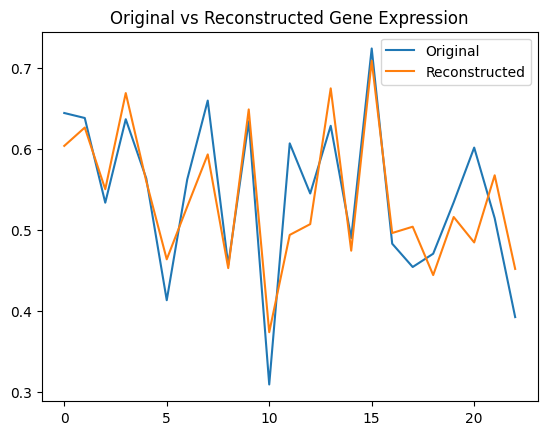

In [19]:
#testing the model with original vs reconstructed graph

import matplotlib.pyplot as plt

sample = test_data[10].reshape(1, -1)
reconstructed = auto_encoder.predict(sample)[0]

plt.plot(sample.flatten(), label='Original')
plt.plot(reconstructed, label='Reconstructed')
plt.legend()
plt.title("Original vs Reconstructed Gene Expression")
plt.show()


In [20]:
#encoders

encoder = keras.Model(inputs = input_layer, outputs = encoding_layer)
encoded_output = encoder.predict(data)


137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [21]:
kmean_cluster = KMeans(n_clusters=3, random_state=0)
kmean_cluster.fit_predict(encoded_output)
labels = kmean_cluster.labels_

scoring = DBI(encoded_output, labels)
print(scoring)

0.6457405949925379


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
Gaussian_mix = GMM(n_components = 3, random_state=0).fit_predict(encoding_genes)
print(Gaussian_mix)
scores = DBI(encoded_output, Gaussian_mix)
print(scores)

[2 2 2 ... 2 2 2]
2.036010861327457


In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components =3, random_state=0)

tsne_pred = tsne.fit_transform(encoded_output)

tsne_pred


array([[  1.9971998 ,   6.425606  ,  -6.861224  ],
       [ 10.975807  ,   2.1060517 ,  -6.4527783 ],
       [-16.997612  ,   9.435175  ,   1.5712729 ],
       ...,
       [  0.46941346,  19.858057  ,   0.79152   ],
       [ 13.555974  ,   8.050218  ,   3.1929648 ],
       [ 11.846529  ,   3.5978563 ,   1.0712817 ]], dtype=float32)

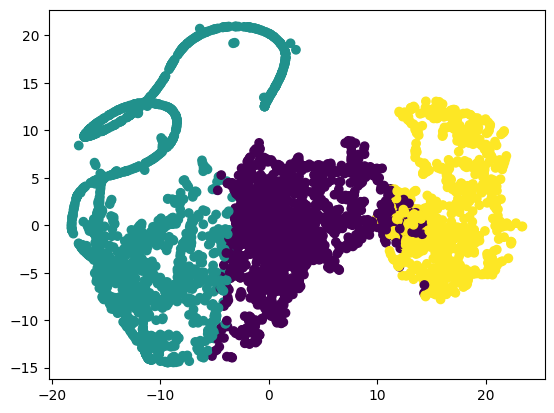

In [24]:
plt.scatter(tsne_pred[:,0], tsne_pred[:,1], c=labels)